In [ ]:
pip install seaborn pandas matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

exp_json = "./experiment-20260218.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment-20260218.csv")
#print("Experiment:")
#print(df)

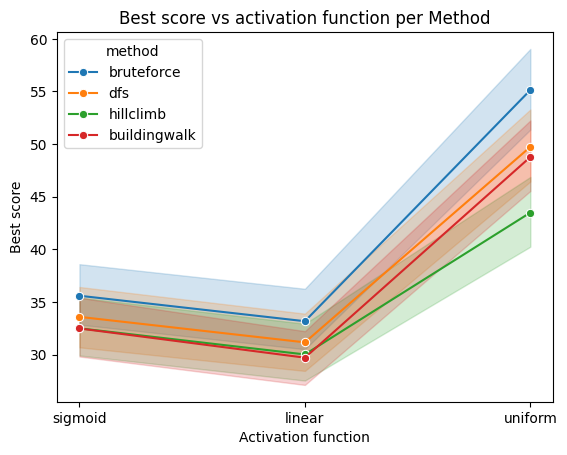

In [11]:
plt.figure()

sns.lineplot(
    data=df,
    x="activation_function",
    y="best_score",
    hue="method",
    hue_order=methods,
    marker="o"
)

plt.xlabel("Activation function")
plt.ylabel("Best score")
plt.title("Best score vs activation function per Method")
plt.show()

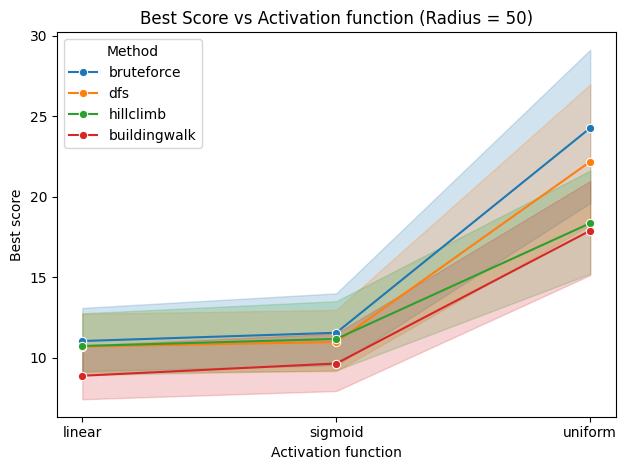

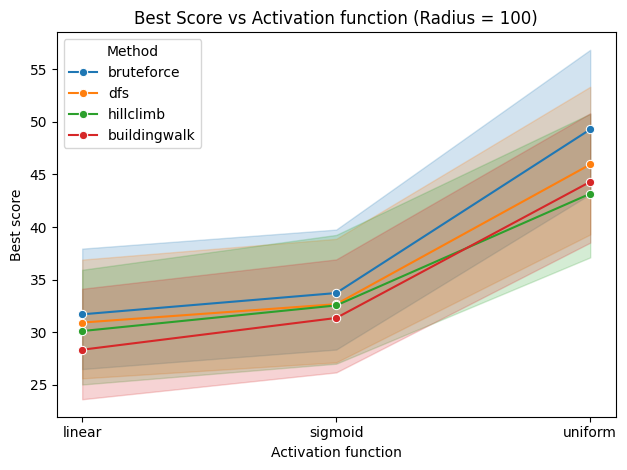

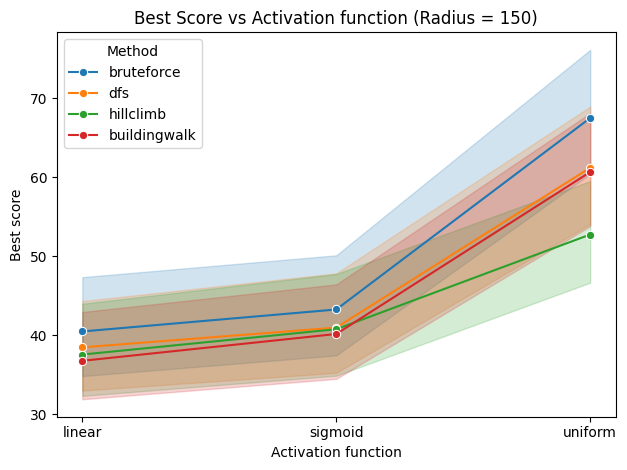

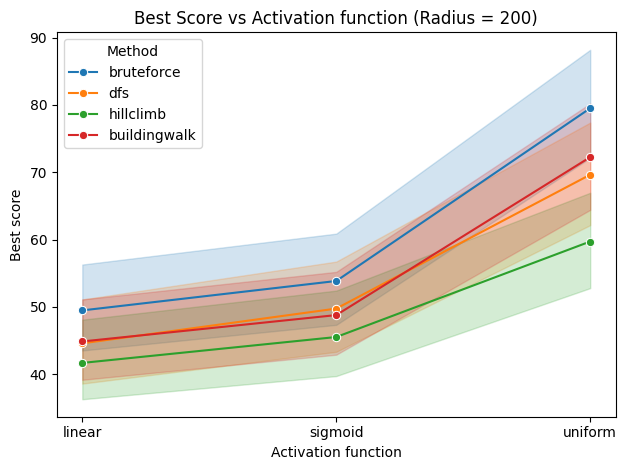

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "activation_function"])
    
    sns.lineplot(
        data=subset,
        x="activation_function",
        y="best_score",
        hue="method",
        hue_order=methods,
        marker="o",
        #errorbar=None  
    )

    plt.xlabel("Activation function")
    plt.ylabel("Best score")
    plt.title(f"Best Score vs Activation function (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.show()


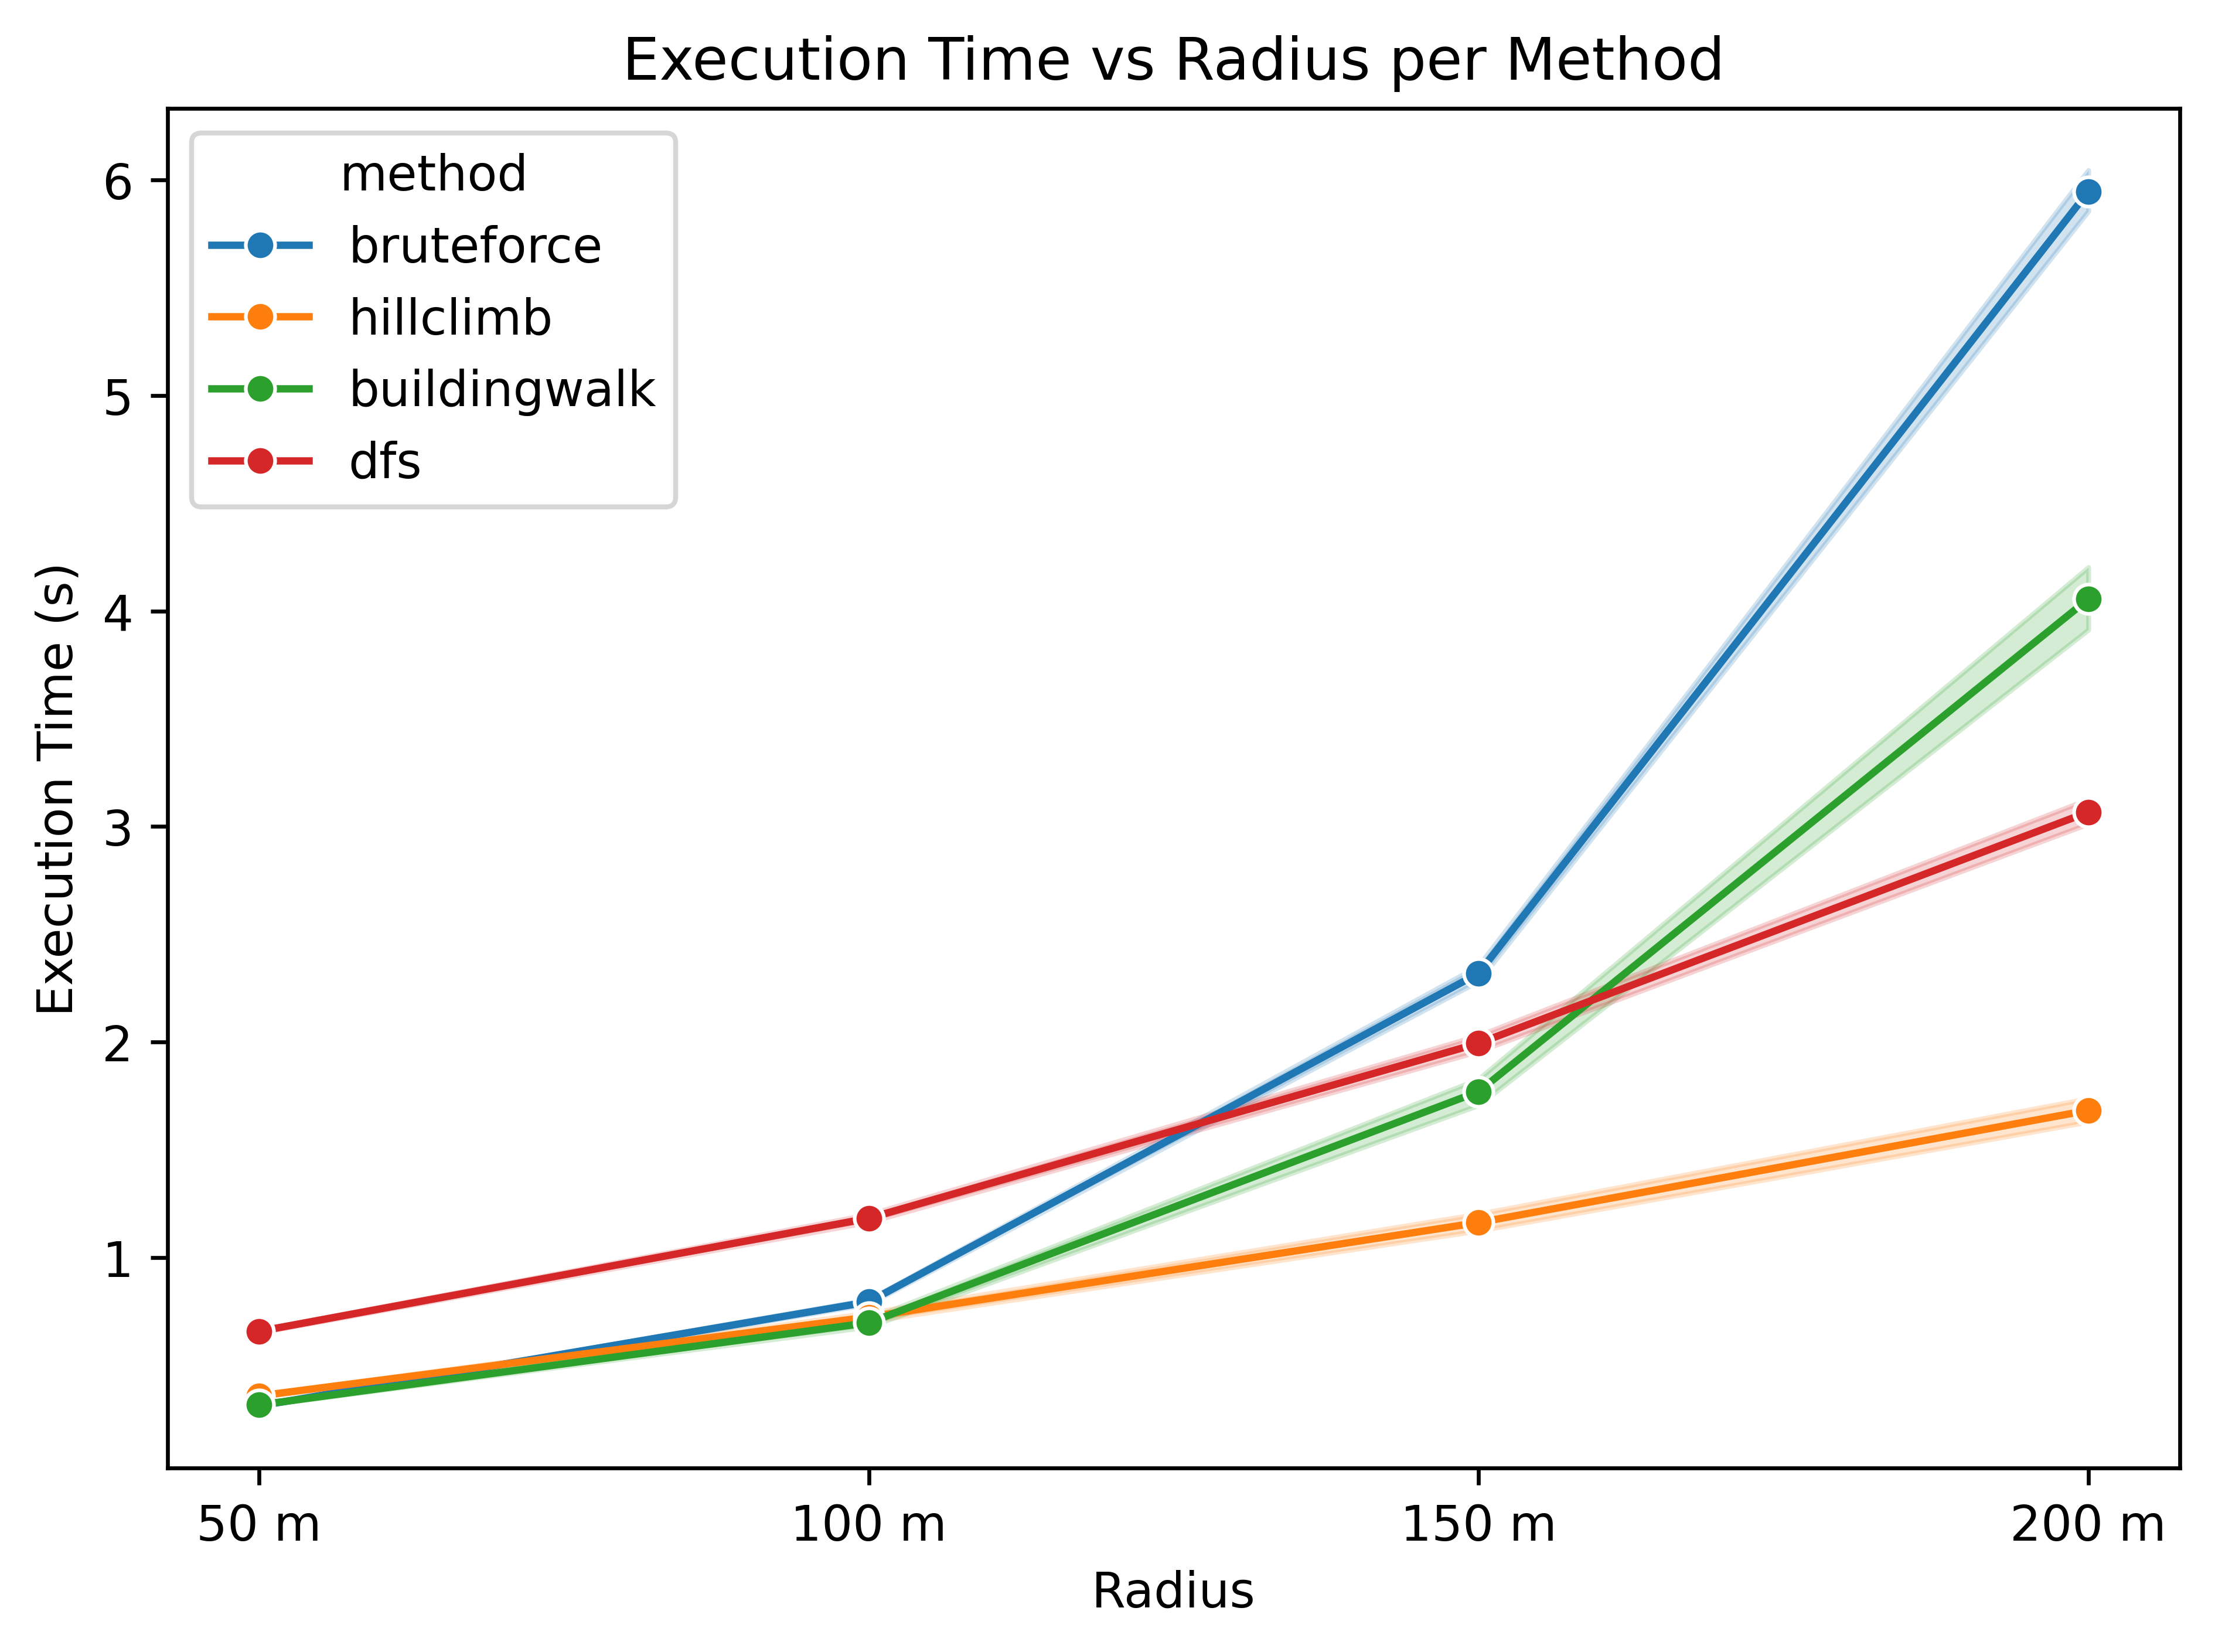

In [26]:
plt.figure(dpi=600)
ax = sns.lineplot(
    data=df,
    x="radius",
    y="execution_time",
    hue="method",
    estimator="mean",
    #errorbar='sd',  # standard deviation as shaded area
    marker="o"
)
radii = sorted(df["radius"].unique())

ax.set_xticks(radii)
ax.set_xticklabels([f"{r} m" for r in radii])
plt.xlabel("Radius")          # X-axis title
plt.ylabel("Execution Time (s)")  # Y-axis title
plt.title("Execution Time vs Radius per Method")
plt.tight_layout()
plt.savefig("exec_time.png")
plt.show()

In [28]:
def compute_topN_means(df, N):
    # sort by best_score descending
    top_df = (
        df.sort_values("best_score", ascending=False)
          .groupby(["activation_function", "method", "radius"])
          .head(N)
    )

    # mean across methods
    summary = (
        top_df
        .groupby(["activation_function", "radius"])["best_score"]
        .mean()
        .reset_index()
    )

    summary["topN"] = f"top{N}"
    return summary

In [29]:
plot_df = pd.concat([
    compute_topN_means(df, 5),
    compute_topN_means(df, 25),
    compute_topN_means(df, 50)
])

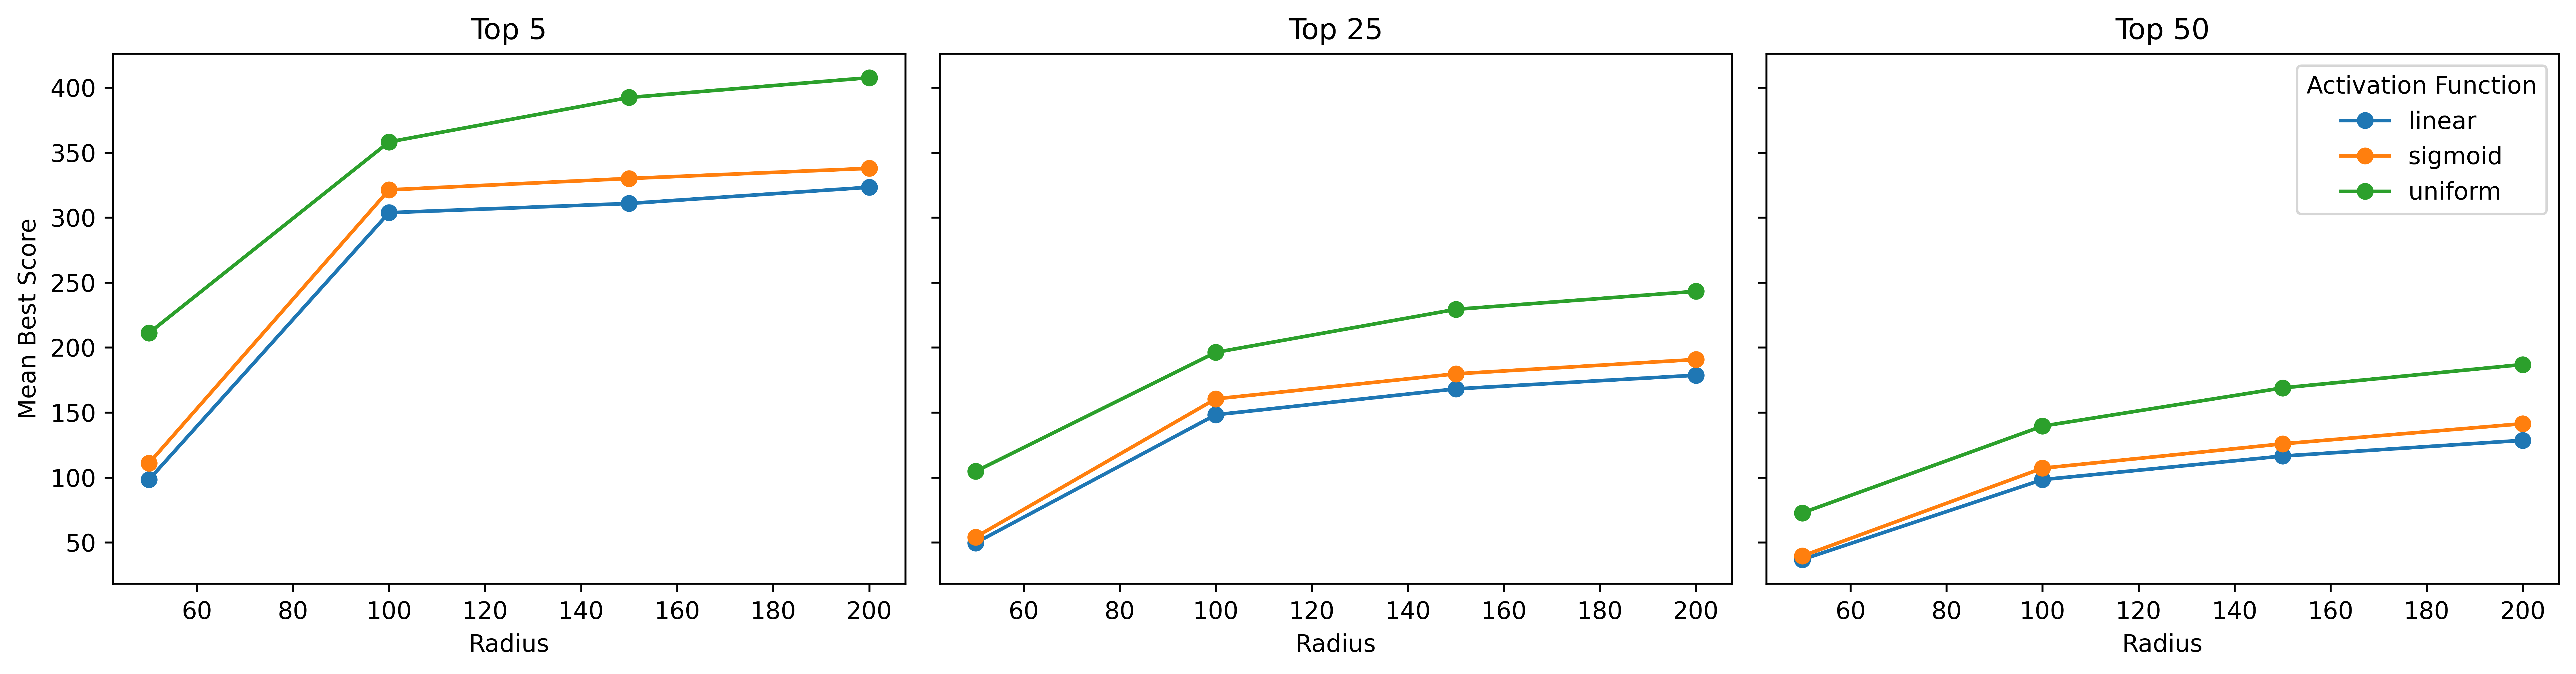

In [30]:
top_levels = ["top5", "top25", "top50"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=600, sharey=True)

for ax, top in zip(axes, top_levels):
    subset = plot_df[plot_df["topN"] == top]

    for activation in subset["activation_function"].unique():
        act_data = subset[subset["activation_function"] == activation]
        ax.plot(
            act_data["radius"],
            act_data["best_score"],
            marker="o",
            label=activation
        )

    ax.set_title(top.replace("top", "Top "))
    ax.set_xlabel("Radius")

axes[0].set_ylabel("Mean Best Score")
axes[-1].legend(title="Activation Function")

plt.tight_layout()
#plt.savefig("activation_comparison.png")
plt.show()